Нам предстоит решить настоящую бизнес-задачу: проанализировать эффективность обоих вариантов посадочной страницы сразу по двум критериям: конверсии покупки и среднему чеку. На основе проведённого анализа необходимо сделать выводы и принять решение: какой из вариантов дизайна более предпочтительный.

Итак, наша фирма предлагает следующие варианты туров и их соответствующие стоимости:

Таиланд — 100 000 рублей;
Турция — 60 000 рублей;
Мальдивы — 200 000 рублей;
Санкт-Петербург — 10 000 рублей;
Камчатка — 150 000 рублей.
Прочитаем наши данные и посмотрим на столбцы таблицы:

In [2]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# читаем на файл
data = pd.read_csv('ab_data_tourist.csv')
data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


Наша таблица представлена следующими полями:

Название поля	Описание
user_id	- идентификатор пользователя, зашедшего на сайт
data - дата захода
group - группа теста (контрольная — А или тестовая — B)
purchase - признак покупки: совершил ли пользователь покупку тура (1 — да, 0 — нет)
price	- цена купленного тура (если покупка не состоялась, цена равна 0)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB


### Задание 7.2
Приведите столбец date к типу данных datetime. Убедитесь в равной длительности проведения тестирования для каждой из групп. Для этого сгруппируйте данные по признаку группы и определите первую и последнюю дату наблюдения для каждой из групп.
В какой промежуток времени проводился A/B-тест?

In [5]:
# переведем столбец date из формата object в формат даты 
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [8]:
# Узнаем в какой промежуток времени проводился A/B-тест
data.groupby('group')['date'].agg(['min', 'max'])


,min,max
group,,
A,2021-01-02,2021-01-24
B,2021-01-02,2021-01-24


### Задание 7.3

Чему равно количество посещений сайта в группах А и B?

In [30]:
print('Количество посещений сайта в группах А и B:')
display(data.groupby('group')['user_id'].agg('count'))

Количество посещений сайта в группах А и B:


group
A    147202
B    147276
Name: user_id, dtype: int64

Чему равно суммарное количество покупок в группах А и B?

In [31]:
print('\nКоличество покупок в группах А и B:')
display(data.groupby('group')['purchase'].agg('sum'))


Количество покупок в группах А и B:


group
A    17723
B    17514
Name: purchase, dtype: int64

Чему равна сумма всех покупок в группах А и B? Ответ приведите в миллионах рублей. Например, 185.52 млн. руб.

In [32]:
print('\nСумма покупок в группах А и B:')
display(data.groupby('group')['price'].agg('sum') / 1e6)


Сумма покупок в группах А и B:


group
A    1436.26
B    1554.10
Name: price, dtype: float64

### ЗАДАНИЕ 7.4
Проверьте, есть ли пользователи, которые в процессе A/B-теста попали в обе тестовые группы?
Если да, то сколько таких уникальных пользователей, если нет, введите в поле для ответа 0.

In [33]:
#выбираем пользователей группы А и В
a_data = data[data['group'] == 'A']
b_data = data[data['group'] == 'B']
# находим пересечения (общие данные) в данных двух группах
user_intersection = set(a_data['user_id']).intersection(set(b_data['user_id']))
#находим количество совпадений
print(len(user_intersection))

1895


In [34]:
#Исключаем пользователей, оказавшихся в обеих группах.Так как далее мы будем работать только с очищенными данными.
updated_data = data[data['user_id'].apply(lambda x: x not in user_intersection)]

### Задание 7.5
Для первичного анализа результатов A/B-тестирования нам понадобится таблица следующего вида:


Для того чтобы получить такую таблицу, сгруппируйте данные по признаку группы. В каждой группе рассчитайте следующие показатели:

количество посещений (количество пользователей);
количество совершённых покупок;
сумма всех покупок в группе.
В полученной сгруппированной таблице переименуйте столбцы на count_visits, count_purchases и sum_price.

Чему на этот раз равно количество посещений сайта в группах А и B?

In [38]:
#группируем данные и считаем новые покаазатели:count_visits, count_purchases и sum_price.

grouped = updated_data.groupby('group').agg({
'user_id': 'count',
'purchase': 'sum',
'price': 'sum'
}).rename(columns={
'user_id': 'count_visits',
'purchase': 'count_purchases',
'price': 'sum_price'
})

In [39]:
# снова количество посещений сайта в группах А и B
print('Количество посещений сайта в группах А и B:')
display(updated_data.groupby('group')['user_id'].agg('count'))

Количество посещений сайта в группах А и B:


group
A    145307
B    145381
Name: user_id, dtype: int64

### Задание 7.6
Добавьте в сгруппированную таблицу столбцы conversion — конверсия покупки (отношение количества покупок к количеству посещений сайта в каждой группе, выраженное в процентах) и mean_check — средний чек (отношение суммы покупок к количеству покупок в каждой группе).

Чему равна конверсия в группах? Ответ приведите в процентах и округлите до сотых. Например, 75.12.

In [40]:
#добавляем признак conversion
grouped['conversion'] = grouped['count_purchases']/grouped['count_visits'] * 100
#добавляем признак mean_check
grouped['mean_check'] = grouped['sum_price']/grouped['count_purchases']
print('Конверсия (в процентах) в группах А и B:')
display(grouped['conversion'].round(2))
print('\nСредний чек (в рублях) в группах А и B:')
display(grouped['mean_check'].round())

Конверсия (в процентах) в группах А и B:


group
A    12.03
B    11.89
Name: conversion, dtype: float64


Средний чек (в рублях) в группах А и B:


group
A    81076.0
B    88665.0
Name: mean_check, dtype: float64

Конверсия варианта А выше, но средний чек ниже, чем у варианта В. Пока сложно что то сказать.

### ЗАДАНИЕ 7.7
Теперь давайте сравним варианты по покупательской способности туров. Для этого постройте сводную таблицу, которая покажет зависимость количества продаж от группы и цены тура.
Визуализируйте полученную сводную таблицу с помощью тепловой карты с аннотацией.
Чему равно количество проданных туров за 60 000 рублей в группах?

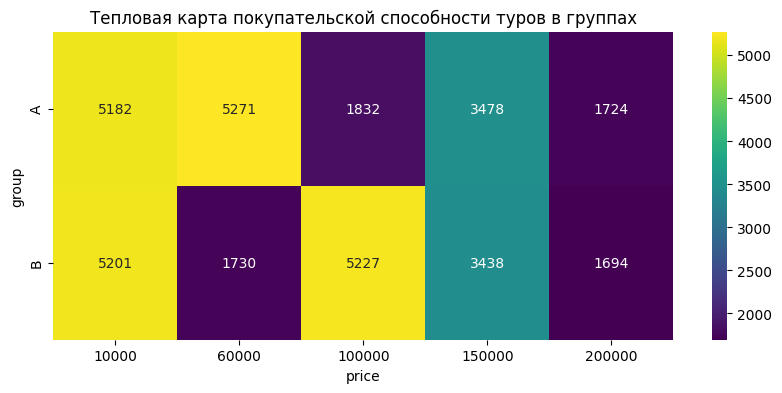

In [37]:

# делаем сводную таблицу и строим тепловую карту
pivot = updated_data[updated_data['price'] > 0].pivot_table(
    index='group', 
    columns='price', 
    values='purchase', 
    aggfunc='sum'
)
fig = plt.figure(figsize=(10, 4))
ax = sns.heatmap(pivot, fmt='.0f', annot=True, cmap='viridis');
ax.set_title('Тепловая карта покупательской способности туров в группах');

### Задание 7.8
Настало время поговорить о стабилизации кумулятивных метрик во времени. Но прежде чем перейти к кумулятивным метрикам, необходимо построить таблицу с ежедневными данными результатов проведения A/B-тестирования.
Сгруппируйте данные по дате и группе тестирования. В каждой группе вычислите количество посещений страницы, количество покупок и сумму покупок.
Добавьте в таблицу информацию о ежедневной конверсии (ежедневное количество покупок / ежедневное количество посещений) в группе и ежедневном среднем чеке (ежедневная сумма покупок / ежедневное количество покупок).
Чему равна конверсия 3 января 2021 года? Ответ приведите в процентах и округлите до сотых.
Чему равен средний чек 3 января 2021 года? Ответ приведите в рублях и округлите до целого.

In [42]:
#Производим группировку по дате и группе. Вычисляем  количество посещений страницы, количество покупок и сумму покупок.

daily_data = updated_data.groupby(['date', 'group']).agg({
    'user_id':'count',
    'purchase':'sum',
    'price': 'sum'
}).reset_index().rename(columns={
    'user_id': 'count_visits',
    'purchase': 'count_purchases',
    'price': 'sum_price'
})
#добавляем в таблицу конверсию
daily_data['conversion'] = daily_data['count_purchases']/daily_data['count_visits'] * 100
# добавляем в таблицу средний чек
daily_data['mean_check'] = daily_data['sum_price']/daily_data['count_purchases']

# определяем конверсию 3 января 2021 года
print('Конверсия 3 января 2020 года:')
display(daily_data[daily_data['date'] == pd.to_datetime('2021-01-03')][['group', 'conversion']].round(2))
 
# определяем средний чек 3 января 2021 года
print('Средний чек 3 января 2020 года:')
display(daily_data[daily_data['date'] == pd.to_datetime('2021-01-03')][['group', 'mean_check']].round())

Конверсия 3 января 2020 года:


,group,conversion
2,A,11.34
3,B,11.39


Средний чек 3 января 2020 года:


,group,mean_check
2,A,82888.0
3,B,87480.0


### Задание 7.9
Добавьте в таблицу с ежедневными показателями кумулятивные признаки:
кумулятивное количество посещений страницы;
кумулятивное количество покупок;
кумулятивную сумму покупок.
Не забудьте при расчёте кумулятивной суммы сгруппировать данные по группам.
Вычислите кумулятивную конверсию и кумулятивный средний чек на основе полученных кумулятивных показателей.
Какая кумулятивная конверсия была в группе B на 20 января 2021 года? Ответ приведите в процентах, округлив до сотых.
Какой кумулятивный средний чек был в группе А на 12 января 2021 года? Ответ приведите в рублях, округлив до целых.

Кумулятивная конверсия 20 января 2020 года:


,group,cum_conversion
36,A,11.98
37,B,11.90


Кумулятивная конверсия 12 января 2020 года:


,group,cum_mean_check
20,A,81492.0
21,B,88352.0


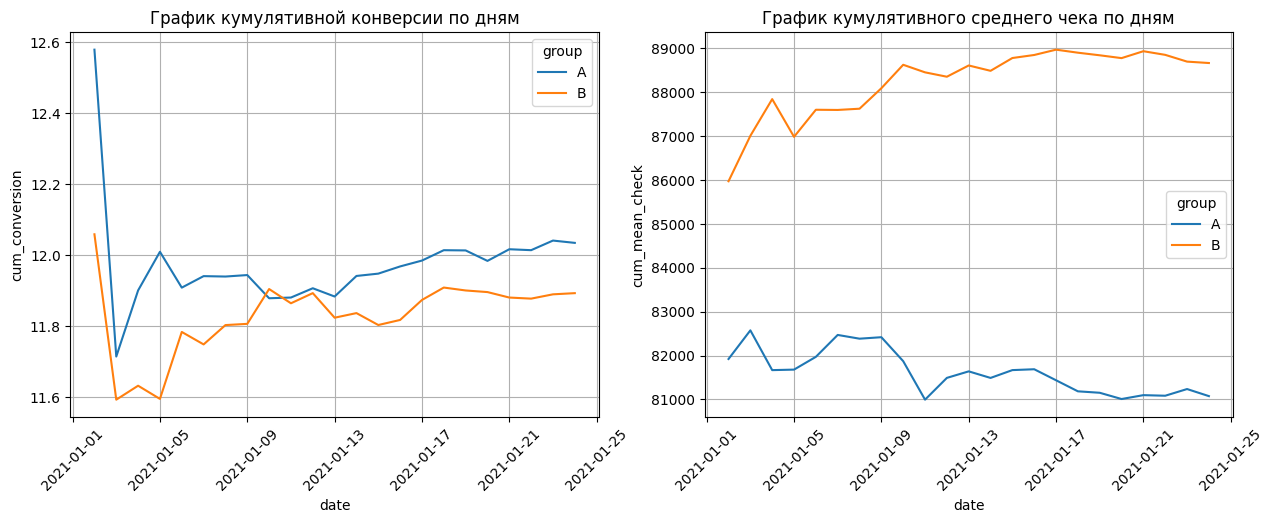

In [43]:
# считаем кумулятивное количество посещений страницы
daily_data['cum_count_visits'] = daily_data.groupby('group')['count_visits'].cumsum()
# считаем кумулятивное количество покупок 
daily_data['cum_count_purchases'] = daily_data.groupby('group')['count_purchases'].cumsum()
# считаем кумулятивную сумму покупок
daily_data['cum_sum_price'] = daily_data.groupby('group')['sum_price'].cumsum()
# считаем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_count_purchases']/daily_data['cum_count_visits'] * 100
# считаем кумулятивный средний чек
daily_data['cum_mean_check'] = daily_data['cum_sum_price']/daily_data['cum_count_purchases']
 
print('Кумулятивная конверсия 20 января 2020 года:')
display(daily_data[daily_data['date'] == pd.to_datetime('2021-01-20')][['group', 'cum_conversion']].round(2))
print('Кумулятивная конверсия 12 января 2020 года:')
display(daily_data[daily_data['date'] == pd.to_datetime('2021-01-12')][['group', 'cum_mean_check']].round())
 
# создаем фигуру размером 15x5
fig, axes= plt.subplots(1, 2, figsize=(15, 5))
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='cum_conversion', data=daily_data, hue='group', ax=axes[0])
# строим lineplot для кумулятивного среднего чека во времени в каждой группе
sns.lineplot(x='date', y='cum_mean_check', data=daily_data, hue='group', ax=axes[1])
# задаем подпись к графику
axes[0].set_title('График кумулятивной конверсии по дням')
axes[1].set_title('График кумулятивного среднего чека по дням')
# задаем поворот меток на оси абсцисс
axes[0].xaxis.set_tick_params(rotation = 45)
axes[1].xaxis.set_tick_params(rotation = 45)
# задаем отображение сетки
axes[0].grid(True);
axes[1].grid(True);

Выводы: из графика кумулятивной конверсии видно, что в целом конверсия группы А выше, чем группы В. Со ременем данная метрика стабилизировалась. Из графика кумулятивного среднего чека  видно, что средний чек группы В намного выше среднего чека группы А. Данная метрик также стабилизировалась со временем.

### Задание 7.10
Настало время переходить к проверке статистической значимости разницы между метриками в группах. Начнём с конверсии.
Какой тест вы примените для проверки гипотезы о равенстве конверсий в группах?
Проведите тестирование при следующих нулевой и альтернативной гипотезе:

Ho: Конверсии в группах А и B равны;
H1: Конверсия в группе А больше, чем конверсия в группе B.
Вычислите p-value вашего теста для конверсий в группах А и B. Сравните полученное значение p-value с уровнем значимости alpha=0.05.




In [47]:
from statsmodels.stats.proportion import proportions_ztest
# считаем количество успехов и наблюдений в каждой из групп
converted_piv= data.groupby('group')['purchase'].agg(
    ['sum', 'count']
)
display(converted_piv)
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А больше чем конверсия в группе B'
alpha = 0.05 # уровень значимости
#вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger'
)
#выводим результат на экран
print('p-value: ', round(p_value, 2))
#сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

,sum,count
group,,
A,17723,147202
B,17514,147276


p-value:  0.11
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


Вывод: принимем нулевую гипотезу.Конверсии в группах А и В равны.

### Задание 7.11
Убедитесь в своих рассуждениях, построив 95%-ый доверительный интервал для конверсий и разницы между ними. Используйте z-критическое.
Укажите нижнюю и верхнюю границы доверительных интервалов. Все границы приведите в процентах и округлите до второго знака после запятой. Например, нижняя граница — 89.24, верхняя граница — 91.25.
Доверительный интервал для конверсии в группах?
Доверительный интервал для разницы конверсии в группах?

In [54]:
from scipy.stats import norm
def conversion_conf_interval(n, x_p, gamma=0.95):
    alpha = 1 - gamma  # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округленных границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)
a_data = updated_data[updated_data['group'] == 'A']
b_data = updated_data[updated_data['group'] == 'B']
conf_interval_a = conversion_conf_interval(
        a_data['user_id'].count(), # размер выборки
        a_data['purchase'].mean() # выборочная пропорция
        )
conf_interval_b = conversion_conf_interval(
    b_data['user_id'].count(), # размер выборки
    b_data['purchase'].mean() # выборочная пропорция
    )
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

Доверительный интервал для конверсии группы А: (11.87, 12.2)
Доверительный интервал для конверсии группы B: (11.73, 12.06)


In [55]:
from scipy.stats import norm
def conversion_conf_interval(n, x_p, gamma=0.95):
    alpha = 1 - gamma  # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округленных границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)
a_data = updated_data[updated_data['group'] == 'A']
b_data = updated_data[updated_data['group'] == 'B']
conf_interval_a = conversion_conf_interval(
        a_data['user_id'].count(), # размер выборки
        a_data['purchase'].mean() # выборочная пропорция
        )
conf_interval_b = conversion_conf_interval(
    b_data['user_id'].count(), # размер выборки
    b_data['purchase'].mean() # выборочная пропорция
    )
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))

def diff_conversion_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) #z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округленных границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['purchase'].mean(), b_data['purchase'].mean()]

# строим доверительный интервал для разности
diff_inverval = diff_conversion_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval)) #выводим результат

Доверительный интервал для конверсии группы А: (11.87, 12.2)
Доверительный интервал для конверсии группы B: (11.73, 12.06)
Доверительный интервал для разности конверсий: (-0.38, 0.09)


Итак, можно сделать вывод, что с надёжностью в 95 % конверсия группы А лежит в интервале от 11.87 % до 12.2 %, а конверсия группы B лежит в интервале от 11.73 % до 12.06 %. Доверительный интервал конверсий лежит в интервале от -0.38 % до 0.09 %. Отсюда можно сделать вывод, что статистической разницы в конверсии между вариантами А и B не существует, то есть они являются равнозначными по данной метрике.

### Задание 7.12
Ранее мы построили таблицу с ежедневными показателями. Теперь она нам снова понадобится, так как нас интересует ежедневный средний чек.
Проверьте гипотезу о нормальности распределения ежедневного среднего чека в каждой из групп тестирования.
Какой тест вы примените для проверки гипотезы о нормальности распределения ежедневного среднего чека?

In [56]:
#Выберем тест Шапиро-Уилка
from scipy.stats import shapiro

# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
 
daily_data_a = daily_data[daily_data['group'] == 'A']
daily_data_b = daily_data[daily_data['group'] == 'B']
 
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(daily_data_a['mean_check'])
shapiro_result_b = shapiro(daily_data_b['mean_check'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value группы А 0.25
p-value группы B 0.09
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


### Задание 7.13
Настало время сравнить варианты дизайна страницы по метрике среднего чека.
Какой тест вы примените для проверки гипотезы о равенстве средних чеков по дням в группах?

In [57]:
# выберем t-test
from scipy.stats import ttest_ind

# нулевая и альтернативная гипотезы
H0 = 'Ежедневные средние чеки в группах А и B равны'
H1 = 'Ежедневный средний чек в группе А меньше чем в группе B'
alpha = 0.05 #уровень значимости
 
daily_data_a = daily_data[daily_data['group'] == 'A']
daily_data_b = daily_data[daily_data['group'] == 'B']
 
#вычисляем результат T-теста для выборок
results = ttest_ind(
    daily_data_a['mean_check'],
    daily_data_b['mean_check'],
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))

p-value: 0.0
Отвергаем нулевую гипотезу. Ежедневные средние чеки в группах А и B равны
Альтернативная гипотеза. H1: Ежедневный средний чек в группе А меньше чем в группе B


Отвергаем нулевую гипотезу. Ежедневные средние чеки в группах А и B равны

### ЗАДАНИЕ 7.14
Постройте 95 %-ый доверительный интервал для среднего чека в каждой группе. Так как выборка ежедневных средних чеков небольшая, используйте t-критическое в своих расчётах.
Укажите нижнюю и верхнюю границы доверительного интервала для истинного среднего чека каждой из групп. Ответ округлите до целого. Например, нижняя граница — 90324, верхняя граница — 241124.

In [62]:
from scipy.stats import t
def mean_check_conf_interval(n, x_mean, x_std, gamma=0.95):
    k = n - 1 #число степеней свободы
    alpha = 1 - gamma # уровень значимости
    t_crit = -t.ppf(alpha/2, k) # t критическое
    eps = t_crit * x_std / n**0.5 #погрешность
    lower_bound = x_mean - eps # левая (нижняя) граница
    upper_bound = x_mean + eps # правая (верхняя) граница
    # возвращаем кортеж из округленных границ интервала
    return round(lower_bound), round(upper_bound)
 
a_daily_data = daily_data[daily_data['group'] == 'A']
b_daily_data = daily_data[daily_data['group'] == 'B']
 
params_a = {
    'n': a_daily_data['count_visits'].count(), # размер выборки
    'x_mean': a_daily_data['mean_check'].mean(), # выборочное средние
    'x_std': a_daily_data['mean_check'].std() # выборочное стандартное отклонения
}
params_b = {
    'n': b_daily_data['count_visits'].count(),# размер выборки
    'x_mean': b_daily_data['mean_check'].mean(), # выборочное средние
    'x_std': b_daily_data['mean_check'].std() # выборочное стандартное отклонения
}
 
print('Доверительный интервал для среднего чека группы А: {}'.format(mean_check_conf_interval(**params_a))) 
print('Доверительный интервал для среднего чека группы B: {}'.format(mean_check_conf_interval(**params_b)))

Доверительный интервал для среднего чека группы А: (79630, 82308)
Доверительный интервал для среднего чека группы B: (87626, 89526)


Доверительный интервал для среднего чека группы А лежит в интервале от 79630 до 82308, а шруппы В - от 87626 до 89526. Доверительные интевалы обоих групп не пересекаются. 
Как успели заметить конвервия в группе А выше, но средний чек в группе В выше. 
Вариант В дизайна посадочной страницы является более предпочтительным, так ка покупательская способность здесь выше.